### Importacion de librerias

In [1]:
import pandas as pd
import numpy as np

### Tipos de datos

#### Categoricos


In [ ]:
#Ordinales
ordinales = ['Gerente', 'Jefe', 'Supervisor']
#Nominales
nominales = ['Empresa', 'Club deportivo', 'Hospital']

#### Numericos


In [ ]:
#Discretos
discretos = [1,2,3,4,5]
#Continuos
continuos = [1.2,1.2,2.6,2.9]

### Medidas de tendencia central

In [5]:
import io
from google.colab import files

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['estadistica.csv']))

Saving estadistica.csv to estadistica (1).csv


In [58]:
df = pd.DataFrame(data)

#### Promedio / Media

In [ ]:
promedio_edad = df['edad'].mean()

#### Mediana

In [ ]:
mediana_edad = df['edad'].median()

#### Moda


In [ ]:
moda_edad = df['edad'].mode()

### Rangos

#### Rango

In [ ]:
rango = df['edad'].max() - df['edad'].min()

#### Rango intercuartilico

In [ ]:
Q1 = np.percentile(df['edad'], 25)
Q3 = np.percentile(df['edad'], 75)

In [ ]:
rango_intercuartilico = Q3 - Q1

### Varianza y desviacion estandar

In [ ]:
varianza = np.var(df['edad'])

In [ ]:
desviacion_estandar = np.std(df['edad'])

### Escalamientos

#### Escalamiento lineal

In [14]:
import seaborn as sns

In [26]:
enteros = [-5,-4,-3,-2,-1, 0, 1, 2 , 3, 4, 5]

In [29]:
numeros = pd.DataFrame()
numeros['enteros'] = enteros

**Escalamiento min-max**

In [30]:
#min-max
X = numeros['enteros']
Xs = ( 2 * X - min(X) - max(X) ) // (max(X) - min(X))

In [ ]:
sns.histplot(Xs)

**Escalamiento Z-score**

In [33]:
#Z-score
X = numeros['enteros']
u = numeros['enteros'].mean()
D = numeros['enteros'].std()

In [34]:
Xs = ( X - u ) // D

In [ ]:
sns.histplot(Xs)

#### Escalamiento no lineal

**Funcion tanh()**

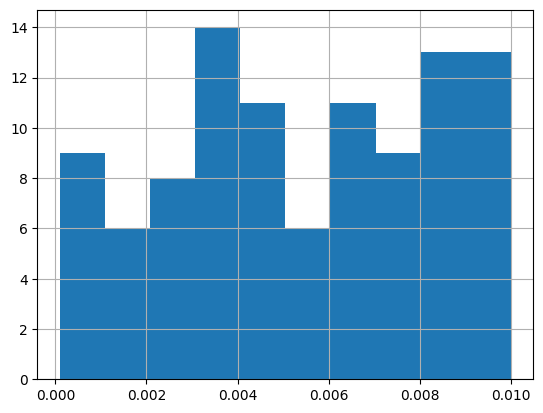

In [45]:
p = 10000
Xs = df.edad.apply(lambda x: np.tanh(x/p)).hist()

**Raiz cuadrada**

In [48]:
Xs = np.sqrt(df['edad'])

In [ ]:
sns.histplot(Xs)

### Procesamiento de variables categoricas

#### One hot (.get_dummies en pandas)

In [52]:
nombre = pd.get_dummies(df['nombre'])
genero = pd.get_dummies(df['genero'])

### Correlaciones

In [75]:
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

#### Matriz de covarianza

**Matriz**

In [70]:
#Se unen las dos columnas con valores numericos a un dataframe nuevo
df_c = pd.DataFrame()
df_c['edad'] = df['edad'].copy()
df_c['enteros'] = numeros['enteros'].copy()

In [72]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    df_c[['edad', 'enteros']]
)

In [73]:
matriz_covarianza = np.cov(scaled.T)

**Mapa de calor**

<Axes: >

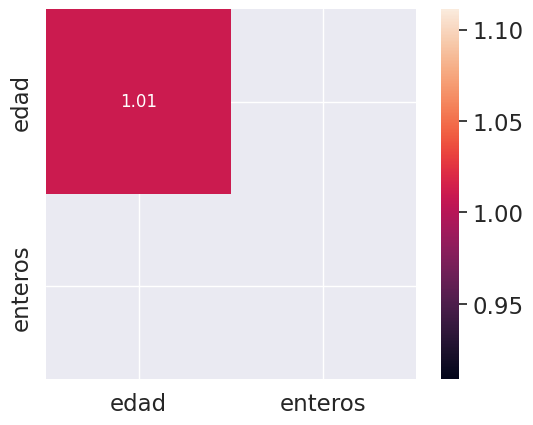

In [98]:
sns.heatmap(matriz_covarianza,cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['edad', 'enteros'],
                 xticklabels=['edad', 'enteros'])

### Fuente bibliografica tomada como ejemplo

#### Curso:

[Curso de matematicas para data science, Francisco Camacho](https://platzi.com/cursos/estadistica-descriptiva/)

**Apunte del curso**

[Anthony Ismael Manotoa Moreno / Apuntes de Estadística Descriptiva
](https://deepnote.com/@anthonymanotoa/Apuntes-de-Estadistica-Descriptiva-cfa882b6-c07f-43fe-9901-1c2e471ce120)